In [37]:
import pandas as pd 
import django
import os
from asgiref.sync import sync_to_async

In [38]:
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "Ecommerce.settings")

'Ecommerce.settings'

In [39]:
django.setup()

In [40]:
from Shop.models import Product

In [46]:
@sync_to_async
def retrieve_products_from_db():
    return list(Product.objects.select_related('category').values('name', 'slug', 'description', 'price', 'category__name'))

In [47]:
products = await retrieve_products_from_db()

In [49]:
df = pd.DataFrame(products)
df.rename(columns={'category__name':'category'})

,name,slug,description,price,category
0,Sosete ieftine,sosete-ieftine,Foarte bune pentru sala si invatat,3.00,Sosete
1,Sosete scumpe,sosete-scumpe,Sosete de cea mai buna calitate. Nu sunt recom...,559.00,Sosete
2,Produs din linie de comanda,produs-din-linie-de-comanda,python manage.py shell,10.00,masini scumpe
3,Produsul 93,produsul-93,fwefeas,93.00,materiale
4,Essence Mascara Lash Princess,essence-mascara-lash-princess,The Essence Mascara Lash Princess is a popular...,9.99,None
...,...,...,...,...,...
195,IWC Ingenieur Automatic Steel,iwc-ingenieur-automatic-steel,The IWC Ingenieur Automatic Steel watch is a d...,4999.99,None
196,Rolex Cellini Moonphase,rolex-cellini-moonphase,The Rolex Cellini Moonphase watch is a masterp...,15999.99,None
197,Rolex Datejust Women,rolex-datejust-women,The Rolex Datejust Women's watch is an iconic ...,10999.99,None
198,Watch Gold for Women,watch-gold-for-women,The Gold Women's Watch is a stunning accessory...,799.99,None


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

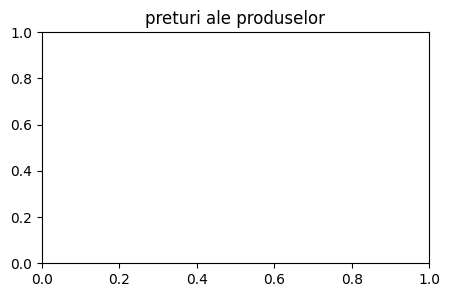

In [54]:
plt.figure(figsize=(5,3))
plt.title("preturi ale produselor")
plt.show()

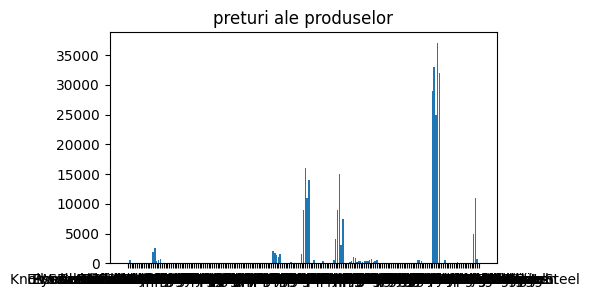

In [58]:
plt.figure(figsize=(5,3))
plt.bar(data=df, height=df['price'], x=df['name'])
plt.title("preturi ale produselor")
plt.show()

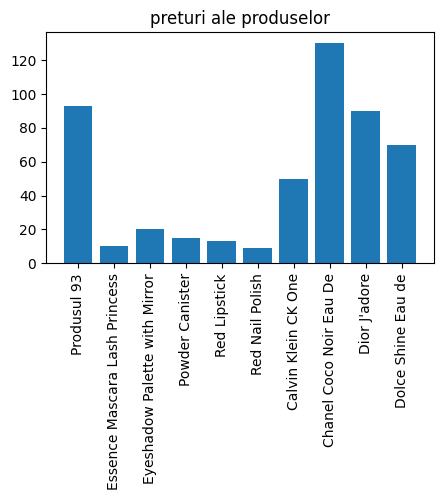

In [66]:
sliced_df = df[3:13]
plt.figure(figsize=(5,3))
plt.bar(data=sliced_df, height=sliced_df['price'], x=sliced_df['name'])
plt.xticks(rotation=90)
plt.title("preturi ale produselor")
plt.show()

C:\Users\Micu\AppData\Local\Temp\ipykernel_10296\3738755926.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sliced_df, x='name', y='price', palette="pastel")


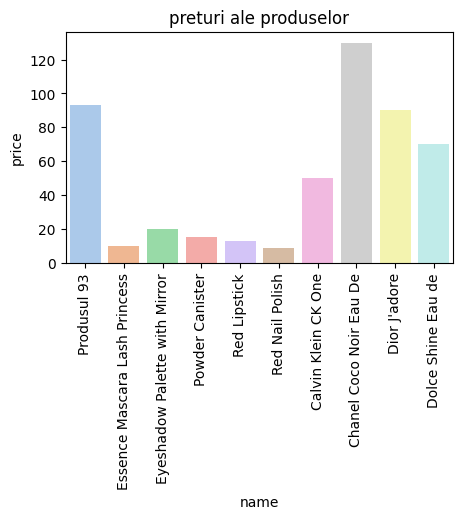

In [70]:
sliced_df = df[3:13]
plt.figure(figsize=(5,3))
sns.barplot(data=sliced_df, x='name', y='price', palette="pastel")
plt.xticks(rotation=90)
plt.title("preturi ale produselor")
plt.show()

In [50]:
products
len(products)

200

In [44]:
products[0].__dict__.keys()

AttributeError: 'dict' object has no attribute '__dict__'

In [ ]:
filter_keys = ['name', 'slug', 'description', 'price']

In [ ]:
products_list = []

for p in products:
    new_dict = {k :p.__dict__[k] for k in filter_keys}
    products_list.append(new_dict)
products_list

[{'name': 'Sosete ieftine',
  'slug': 'sosete-ieftine',
  'description': 'Foarte bune pentru sala si invatat',
  'price': Decimal('3.00')},
 {'name': 'Sosete scumpe',
  'slug': 'sosete-scumpe',
  'description': 'Sosete de cea mai buna calitate. Nu sunt recomandate sarakilor (!!!Atentie, glumita!!!)',
  'price': Decimal('559.00')},
 {'name': 'Produs din linie de comanda',
  'slug': 'produs-din-linie-de-comanda',
  'description': 'python manage.py shell',
  'price': Decimal('10.00')},
 {'name': 'Produsul 93',
  'slug': 'produsul-93',
  'description': 'fwefeas',
  'price': Decimal('93.00')},
 {'name': 'Essence Mascara Lash Princess',
  'slug': 'essence-mascara-lash-princess',
  'description': 'The Essence Mascara Lash Princess is a popular mascara known for its volumizing and lengthening effects. Achieve dramatic lashes with this long-lasting and cruelty-free formula.',
  'price': Decimal('9.99')},
 {'name': 'Eyeshadow Palette with Mirror',
  'slug': 'eyeshadow-palette-with-mirror',
  'de

In [ ]:
df = pd.DataFrame(products_list)
df

,name,slug,description,price
0,Sosete ieftine,sosete-ieftine,Foarte bune pentru sala si invatat,3.00
1,Sosete scumpe,sosete-scumpe,Sosete de cea mai buna calitate. Nu sunt recom...,559.00
2,Produs din linie de comanda,produs-din-linie-de-comanda,python manage.py shell,10.00
3,Produsul 93,produsul-93,fwefeas,93.00
4,Essence Mascara Lash Princess,essence-mascara-lash-princess,The Essence Mascara Lash Princess is a popular...,9.99
...,...,...,...,...
195,IWC Ingenieur Automatic Steel,iwc-ingenieur-automatic-steel,The IWC Ingenieur Automatic Steel watch is a d...,4999.99
196,Rolex Cellini Moonphase,rolex-cellini-moonphase,The Rolex Cellini Moonphase watch is a masterp...,15999.99
197,Rolex Datejust Women,rolex-datejust-women,The Rolex Datejust Women's watch is an iconic ...,10999.99
198,Watch Gold for Women,watch-gold-for-women,The Gold Women's Watch is a stunning accessory...,799.99


In [ ]:
df['price'].max()

Decimal('36999.99')

In [ ]:
df['price'].mean()

np.float64(1526.4247)

In [ ]:
df[df['price'] ==df['price'].max()]

,name,slug,description,price
175,Durango SXT RWD,durango-sxt-rwd,The Durango SXT RWD is a spacious and versatil...,36999.99
